In [237]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [238]:
df=pd.read_excel('Housing Prices.xlsx')

In [239]:
df

,d,LotFrontage,LotArea,Alley,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageType,GarageArea,SalePrice
0,1,65.0,8450,NaN,196.0,856,854,1710,Attchd,548,208500
1,2,80.0,9600,NaN,0.0,1262,0,1262,Attchd,460,181500
2,3,68.0,11250,NaN,162.0,920,866,1786,Attchd,608,223500
3,4,60.0,9550,NaN,0.0,961,756,1717,Detchd,642,140000
4,5,84.0,14260,NaN,350.0,1145,1053,2198,Attchd,836,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,NaN,0.0,953,694,1647,Attchd,460,175000
1456,1457,85.0,13175,NaN,119.0,2073,0,2073,Attchd,500,210000
1457,1458,66.0,9042,NaN,0.0,1188,1152,2340,Attchd,252,266500
1458,1459,68.0,9717,NaN,0.0,1078,0,1078,Attchd,240,142125


# Exploratory Analysis

In [241]:
df.columns

Index(['d', 'LotFrontage', 'LotArea', 'Alley', 'MasVnrArea', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'GarageType', 'GarageArea', 'SalePrice'],
      dtype='object')

In [242]:
df.describe()

,d,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,SalePrice
count,1460.000000,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,103.685262,1162.626712,346.992466,1515.463699,472.980137,180921.195890
std,421.610009,24.284752,9981.264932,181.066207,386.587738,436.528436,525.480383,213.804841,79442.502883
min,1.000000,21.000000,1300.000000,0.000000,334.000000,0.000000,334.000000,0.000000,34900.000000
25%,365.750000,59.000000,7553.500000,0.000000,882.000000,0.000000,1129.500000,334.500000,129975.000000
50%,730.500000,69.000000,9478.500000,0.000000,1087.000000,0.000000,1464.000000,480.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,166.000000,1391.250000,728.000000,1776.750000,576.000000,214000.000000
max,1460.000000,313.000000,215245.000000,1600.000000,4692.000000,2065.000000,5642.000000,1418.000000,755000.000000


In [244]:
df.shape

(1460, 11)

In [252]:
df.dtypes

d                int64
LotFrontage    float64
LotArea          int64
Alley           object
MasVnrArea     float64
1stFlrSF         int64
2ndFlrSF         int64
GrLivArea        int64
GarageType      object
GarageArea       int64
SalePrice        int64
dtype: object

In [248]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [ ]:
df['GarageType'].value_counts()

In [255]:
df.groupby(['GarageType']).agg({'GarageArea':np.mean, 'SalePrice':np.mean}).sort_values(by='SalePrice', ascending=0)

,GarageArea,SalePrice
GarageType,,
BuiltIn,579.590909,254751.738636
Attchd,524.587356,202892.656322
Basment,441.210526,160570.684211
2Types,919.500000,151283.333333
Detchd,426.857881,134091.162791
CarPort,451.333333,109962.111111


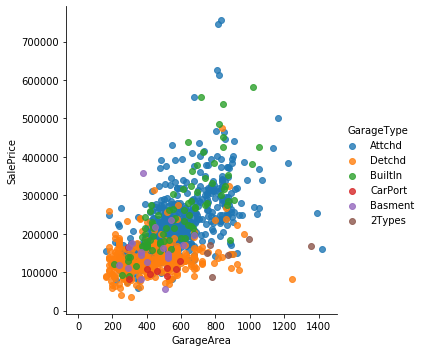

In [266]:
sns.lmplot(data=df, y='SalePrice', x='GarageArea', hue='GarageType', fit_reg=False)

In [ ]:
sns.lmplot(data=df, y='SalePrice', x='GarageArea', hue='GarageType', fit_reg=False)

# Checking for Missing Values

In [311]:
#If in any column 25% of data is missing, we will removen that column
df.isnull().sum()/len(df)*100

d               0.000000
LotFrontage    17.739726
LotArea         0.000000
Alley          93.767123
MasVnrArea      0.547945
1stFlrSF        0.000000
2ndFlrSF        0.000000
GrLivArea       0.000000
GarageType      5.547945
GarageArea      0.000000
SalePrice       0.000000
dtype: float64

In [234]:
## remove column Alley

In [272]:
df_1 = df

In [273]:
df_1

,d,LotFrontage,LotArea,Alley,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageType,GarageArea,SalePrice
0,1,65.0,8450,NaN,196.0,856,854,1710,Attchd,548,208500
1,2,80.0,9600,NaN,0.0,1262,0,1262,Attchd,460,181500
2,3,68.0,11250,NaN,162.0,920,866,1786,Attchd,608,223500
3,4,60.0,9550,NaN,0.0,961,756,1717,Detchd,642,140000
4,5,84.0,14260,NaN,350.0,1145,1053,2198,Attchd,836,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,NaN,0.0,953,694,1647,Attchd,460,175000
1456,1457,85.0,13175,NaN,119.0,2073,0,2073,Attchd,500,210000
1457,1458,66.0,9042,NaN,0.0,1188,1152,2340,Attchd,252,266500
1458,1459,68.0,9717,NaN,0.0,1078,0,1078,Attchd,240,142125


In [281]:
## dropping Column
df_1=df_1.drop(['Alley'], axis=1)

In [283]:
df_1.columns

Index(['d', 'LotFrontage', 'LotArea', 'MasVnrArea', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageType', 'GarageArea', 'SalePrice'],
      dtype='object')

In [286]:
# Converting dataset into an array
x=df_1.values

In [312]:
x

array([[1, 65.0, 8450, ..., 'Attchd', 548, 208500],
       [2, 80.0, 9600, ..., 'Attchd', 460, 181500],
       [3, 68.0, 11250, ..., 'Attchd', 608, 223500],
       ...,
       [1458, 66.0, 9042, ..., 'Attchd', 252, 266500],
       [1459, 68.0, 9717, ..., 'Attchd', 240, 142125],
       [1460, 75.0, 9937, ..., 'Attchd', 276, 147500]], dtype=object)

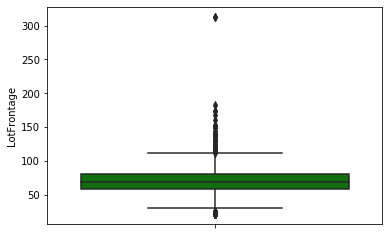

In [284]:
## checking for outlier
sns.boxplot(y='LotFrontage', data=df_1, color='green') # it has oultier this implies we will go with median value

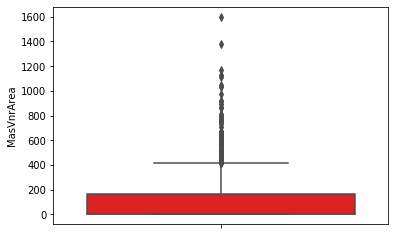

In [292]:
## checking for outlier
sns.boxplot(y='MasVnrArea', data=df_1, color='red') # it has oultier this implies we will go with median value

# Treatment of Missing Value-SkLearn Package 

In [287]:
x

array([[1, 65.0, 8450, ..., 'Attchd', 548, 208500],
       [2, 80.0, 9600, ..., 'Attchd', 460, 181500],
       [3, 68.0, 11250, ..., 'Attchd', 608, 223500],
       ...,
       [1458, 66.0, 9042, ..., 'Attchd', 252, 266500],
       [1459, 68.0, 9717, ..., 'Attchd', 240, 142125],
       [1460, 75.0, 9937, ..., 'Attchd', 276, 147500]], dtype=object)

In [290]:
## Imputing column LotFrontage with median value
from sklearn.preprocessing import Imputer
imp=Imputer(missing_values = 0,strategy = 'median', axis=0)
imp=imp.fit_transform(x[:,1:2])

C:\Users\Consultant20162\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Consultant20162\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median for 1 results
  r = func(a, **kwargs)


In [291]:
x

array([[1, 65.0, 8450, ..., 'Attchd', 548, 208500],
       [2, 80.0, 9600, ..., 'Attchd', 460, 181500],
       [3, 68.0, 11250, ..., 'Attchd', 608, 223500],
       ...,
       [1458, 66.0, 9042, ..., 'Attchd', 252, 266500],
       [1459, 68.0, 9717, ..., 'Attchd', 240, 142125],
       [1460, 75.0, 9937, ..., 'Attchd', 276, 147500]], dtype=object)

In [293]:
## Imputing column MasVnrArea with median value
from sklearn.preprocessing import Imputer
imp=Imputer(missing_values = 0,strategy = 'median', axis=0)
imp=imp.fit_transform(x[:,3:4])

C:\Users\Consultant20162\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Consultant20162\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median for 1 results
  r = func(a, **kwargs)


In [294]:
x

array([[1, 65.0, 8450, ..., 'Attchd', 548, 208500],
       [2, 80.0, 9600, ..., 'Attchd', 460, 181500],
       [3, 68.0, 11250, ..., 'Attchd', 608, 223500],
       ...,
       [1458, 66.0, 9042, ..., 'Attchd', 252, 266500],
       [1459, 68.0, 9717, ..., 'Attchd', 240, 142125],
       [1460, 75.0, 9937, ..., 'Attchd', 276, 147500]], dtype=object)

In [297]:
## Imputing column GarageType with mode value, it is categorical variable
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
imp=imp.fit_transform(x[:,7:8])

In [298]:
x

array([[1, 65.0, 8450, ..., 'Attchd', 548, 208500],
       [2, 80.0, 9600, ..., 'Attchd', 460, 181500],
       [3, 68.0, 11250, ..., 'Attchd', 608, 223500],
       ...,
       [1458, 66.0, 9042, ..., 'Attchd', 252, 266500],
       [1459, 68.0, 9717, ..., 'Attchd', 240, 142125],
       [1460, 75.0, 9937, ..., 'Attchd', 276, 147500]], dtype=object)

# Treatment of Missing Value-Direct Method

In [299]:
df_2=df_1

In [300]:
df_2.columns

Index(['d', 'LotFrontage', 'LotArea', 'MasVnrArea', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageType', 'GarageArea', 'SalePrice'],
      dtype='object')

In [301]:
## Imputing column MasVnrArea with median value
df_2['LotFrontage']=df_2['LotFrontage'].fillna(df_2['LotFrontage'].median())

In [313]:
## Imputing column MasVnrArea with median value
df_2['MasVnrArea']=df_2['MasVnrArea'].fillna(df_2['MasVnrArea'].median())

In [315]:
## Imputing column GarageType with mode value, it is categorical variable i..e Attchd
df_2['GarageType']=df_2['GarageType'].fillna('Attchd')


In [317]:
## Checking for Missing Values
df_2.isnull().sum()

d              0
LotFrontage    0
LotArea        0
MasVnrArea     0
1stFlrSF       0
2ndFlrSF       0
GrLivArea      0
GarageType     0
GarageArea     0
SalePrice      0
dtype: int64